<a href="https://colab.research.google.com/github/AmandeepSingh285/Lung-Disease-Detection/blob/master/mobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table width = "80%">
  <thead>
    <th>Charecteristic</th>
    <th>Value</th>
  </thead>
  <tr>
    <td> Dataset </td>
    <td> Pneumonia </td>
  </tr>
  <tr>
    <td> Architecture </td>
    <td> MobileNet </td>
  </tr>
  <tr>
    <td> Training </td>
    <td> Pre-Trained </td>
  </tr>
</table>

In [ ]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import shutil
import glob
import cv2
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping
import datetime
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.callbacks import ReduceLROnPlateau
from keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNet
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate

labels = ["NORMAL", "PNEUMONIA"]

%load_ext tensorboard

driveValImages    = os.path.join(os.getcwd(), 'drive/MyDrive/Google_Colab/Lung_disease_detection/working_dataset/val')
driveTestImages   = os.path.join(os.getcwd(), 'drive/MyDrive/Google_Colab/Lung_disease_detection/working_dataset/test')
driveTrainImages  = os.path.join(os.getcwd(), 'drive/MyDrive/Google_Colab/Lung_disease_detection/working_dataset/train')
checkpoint_path = "/content/drive/MyDrive/Google_Colab/Lung_disease_detection/working_dataset/weights/pneumonia_mobileNet.h5"

print("Libraries imported")

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Libraries imported


In [ ]:
base_model = MobileNet(weights='imagenet',input_shape=(224, 224, 3),include_top=False)

base_model.trainable = False

add_model = Sequential()
add_model.add(base_model)
add_model.add(GlobalAveragePooling2D())
add_model.add(Dropout(0.5))
add_model.add(Dense(1, activation='sigmoid'))

# input = tf.keras.Input(shape=(224, 224, 3))
# x = base_model(input, training=False)
# x = tf.keras.layers.GlobalAveragePooling2D()(x)

# output = tf.keras.layers.Dense(1)(x)

# model = tf.keras.Model(input, output)

# model.compile(optimizer='adam',
#              loss='binary_crossentropy',
#              metrics=['accuracy'])

model = add_model
model.summary()
metrics = ['accuracy', Precision(name = 'precision'), Recall(name = 'recall')]
optimizer = Adam(learning_rate = 1e-4)
model.compile(optimizer = optimizer, loss = ['binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy'], metrics = metrics)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 1)                 1025      
                                                                 
Total params: 3,229,889
Trainable params: 1,025
Non-trainable params: 3,228,864
_________________________________________________________________
Model: "sequential_1"
__________________

In [ ]:
train_datagen = ImageDataGenerator(
                   rescale=1/255.0,
                   rotation_range=20, 
                   zoom_range=0.15,
                   width_shift_range=0.1,
                   height_shift_range=0.1,
                   horizontal_flip=True,
                   vertical_flip=False,
                   )

val_datagen = ImageDataGenerator(
    rescale = 1/255.0
)

train_generator = train_datagen.flow_from_directory(
                                   driveTrainImages,
                                   target_size=(224, 224),
                                   color_mode='rgb',
                                   batch_size= 32,
                                   class_mode='binary',
                                   shuffle = True
                                   )
val_generator = val_datagen.flow_from_directory(
                                driveValImages,
                                target_size=(224, 224),
                                batch_size= 32,
                                color_mode='rgb',
                                class_mode='binary',
                                shuffle = True
                                )

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
                                driveTestImages,
                                target_size=(224, 224),
                                batch_size=32,
                                shuffle=False,
                                class_mode='binary',
                                color_mode = 'rgb'
                                )

print("DONE")

Found 4232 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
DONE


In [ ]:
checkpointOne = ReduceLROnPlateau(
    monitor = 'val_accuracy',
    patience = 2,
    verbose = 1,
    factor = 0.3,
    min_lr = 3e-7
)
checkpoint_saver = ModelCheckpoint('pneumonia_mobileNet.h5', save_best_only=True)
checkPointTwo = EarlyStopping(monitor='acc', patience=1)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%d%m%Y-%H%M")
checkPointThree = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
callbacks_list = [checkpointOne, checkpoint_saver, checkPointTwo, checkPointThree]

In [ ]:
history = model.fit(train_generator, epochs=10, validation_data=val_generator, callbacks=callbacks_list)

Epoch 1/10
133/133 [==============================] - 1664s 12s/step - loss: 0.6319 - accuracy: 0.7302 - precision: 0.8120 - recall: 0.8620 - val_loss: 0.9415 - val_accuracy: 0.5020 - val_precision: 0.5010 - val_recall: 0.9980 - lr: 1.0000e-04
Epoch 2/10
133/133 [==============================] - 57s 431ms/step - loss: 0.5382 - accuracy: 0.7774 - precision: 0.8334 - recall: 0.9019 - val_loss: 0.7171 - val_accuracy: 0.5370 - val_precision: 0.5193 - val_recall: 0.9940 - lr: 1.0000e-04
Epoch 3/10
133/133 [==============================] - 57s 430ms/step - loss: 0.4533 - accuracy: 0.8051 - precision: 0.8483 - recall: 0.9208 - val_loss: 0.5546 - val_accuracy: 0.6530 - val_precision: 0.5918 - val_recall: 0.9860 - lr: 1.0000e-04
Epoch 4/10
133/133 [==============================] - 58s 433ms/step - loss: 0.3995 - accuracy: 0.8242 - precision: 0.8652 - recall: 0.9240 - val_loss: 0.4999 - val_accuracy: 0.7030 - val_precision: 0.6296 - val_recall: 0.9860 - lr: 1.0000e-04
Epoch 5/10
133/133 [====

In [ ]:
! mv '/content/pneumonia_mobileNet.h5' '/content/drive/MyDrive/Google_Colab/Lung_disease_detection/working_dataset/weights/pneumonia_mobileNet.h5'

In [ ]:
%tensorboard --logdir logs/fit

<IPython.core.display.Javascript object>

In [ ]:
model.load_weights(checkpoint_path)
print("model loaded")

model loaded


In [ ]:
metrics = model.evaluate(test_generator, return_dict = True)
for metric in metrics:
  print(f"{metric} : {metrics[metric]}")

20/20 [==============================] - 494s 26s/step - loss: 0.4247 - accuracy: 0.7821 - precision: 0.7540 - recall: 0.9667
loss : 0.42470139265060425
accuracy : 0.7820512652397156
precision : 0.7540000081062317
recall : 0.9666666388511658


In [ ]:
predictions = model.predict(test_generator)
predictions = np.round(abs(predictions))
classes = test_generator.labels
print(predictions)

[[1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.

In [ ]:
classification_report(classes, predictions, target_names = labels)

'              precision    recall  f1-score   support\n\n      NORMAL       0.90      0.47      0.62       234\n   PNEUMONIA       0.75      0.97      0.85       390\n\n    accuracy                           0.78       624\n   macro avg       0.82      0.72      0.73       624\nweighted avg       0.81      0.78      0.76       624\n'

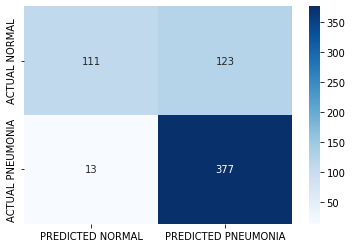

In [ ]:
xlabels = ["PREDICTED NORMAL", "PREDICTED PNEUMONIA"]
ylabels = ["ACTUAL NORMAL", "ACTUAL PNEUMONIA"]

matrix = confusion_matrix(classes, predictions)
sns.heatmap(matrix, annot = True, fmt = "d", cmap = "Blues", xticklabels = xlabels, yticklabels = ylabels)